In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("drive/MyDrive/2021_Fall_Final_Project")

In [3]:
import requests

example_pic_url = 'https://static.wikia.nocookie.net/darksouls/images/a/a7/Drakeblood_Greatsword_%28DSIII%29.png/revision/latest/scale-to-width-down/512?cb=20160612044933'
headers = {
    'User-Agent' : 'Google-Robot'
}

pic_content = requests.get(url=example_pic_url,headers=headers).content
with open('./example.png','wb') as fpic:
  fpic.write(pic_content)

In [4]:
import caption
import classificaton
from Model1_ResNet18 import ResidualBlock,ResNet,ResNet18

group = classificaton.getGroup('./example.png')
print(group)
seed = caption.getCaption('./example.png')
print(seed)

Weapon
a black dog is jumping in the air


In [5]:
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

In [6]:
gpt2.copy_checkpoint_from_gdrive(run_name='description_gpt2_small')

In [7]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='description_gpt2_small')

Loading checkpoint checkpoint/description_gpt2_small/model-600
INFO:tensorflow:Restoring parameters from checkpoint/description_gpt2_small/model-600


Pleade input a name for the item.
Drake Blood Greatsword


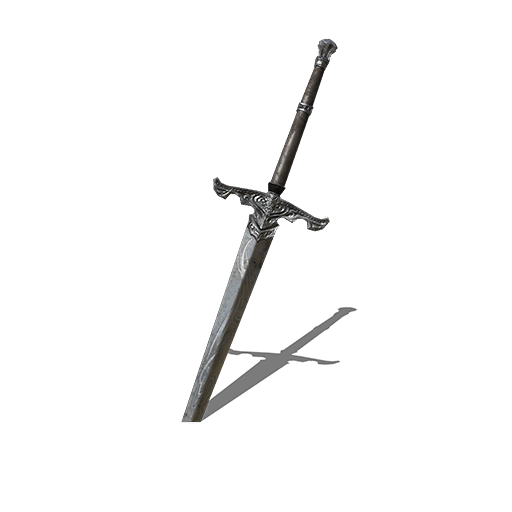

group:Weapon
name:Drake Blood Greatsword
description:Weapon born from the soul of the Dark Chieftain. Serves as a shockwave, and can also break guard from direct fire. The Drake Blood Greatsword is a relic of the fallen moon Gyr, and was the forebear of the first moon Gyr. Heavy stone guardians are out to stop them.
group:Weapon
name:Drake Blood Greatsword
description:Gundyr's golden sword, used to face chaos demons. Gundyr, or the Ever-Burning King, was born into a dark past, and scarred by a burning desire to be with the pure, blue Gwyn. His body felled by an eternal flame, but could not be extinguished, as was his mind.
group:Weapon
name:Drake Blood Greatsword
description:Blood spilled by the wielder of this deep-rooted faith. Very few injuries necessitate the use of shields, but the intense faith of one who holds this sword may lead one to believe that all who touch it will be blessed by something greater. Skill: FaithRepel all attacks with a low reaction times and a light shield.


In [8]:
import IPython.display

print("Pleade input a name for the item.")
name = input()
text = gpt2.generate(
            sess,
            run_name = 'description_gpt2_small',
            length=200,
            temperature=0.7,
            prefix="<begin>" + '\t' + group + '\t' + seed + '\t' + name,
            truncate="<end>",
            nsamples=3,
            batch_size=3,
            return_as_list=True
            )

display(IPython.display.Image('./example.png'))

for i in range(0,len(text)):
  line = 'group:' + text[i].split('\t')[1] + '\n'
  line += 'name:' + text[i].split('\t')[3] + '\n'
  line += 'description:' + text[i].split('\t')[4] + '\n'
  print(line.strip())